In [1]:
import numpy as np

In [2]:
security_breaches = np.array([[0, 5, 1], [0, 2, 0], [1, 1, 2], [2, 2, 1],[0, 0, 0]])

*__security_breaches__* contains the data breach information of 3 clients over 5 years. 

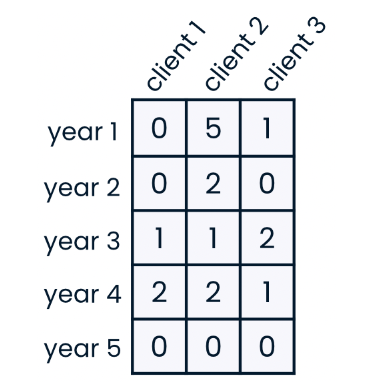

## Summing Data:

*__.sum()__* adds the breaches of all clients in all years. 

In [3]:
security_breaches.sum()

17

Throughout the 5 years, 3 clients have encountered 17 security breaches.

## Aggregating rows/columns:

In [4]:
security_breaches.sum(axis = 0)

array([ 3, 10,  4])

*__axis = 0__* argument generates column total(sum across rows)
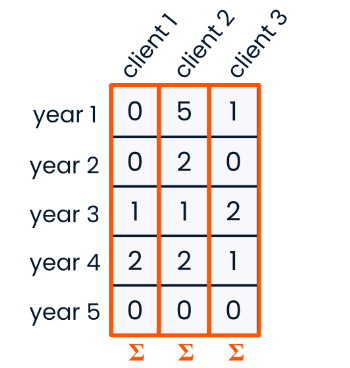

In [5]:
security_breaches.sum(axis = 1)

array([6, 2, 4, 5, 0])

*__axis = 1__* argument generates row total (sum across columns)
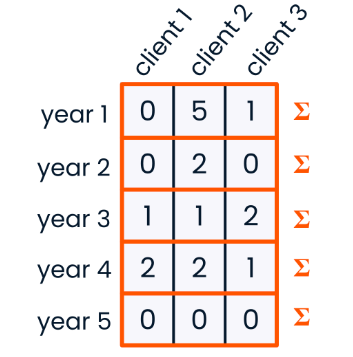

## Find the minimum and maximum values:

In [6]:
security_breaches.min()

0

In [7]:
security_breaches.max()

5

In [8]:
security_breaches.min(axis = 0)

array([0, 0, 0])

*__axis = 0__* argument finds minimum values across columns.

In [9]:
security_breaches.min(axis = 1)

array([0, 0, 1, 1, 0])

*__axis = 1__* argument finds minimum values across rows.

## Calculating mean:

In [10]:
security_breaches.mean()

1.1333333333333333

By default, mean calculated is for security breaches across columns for all clients(mean per year for all clients)

In [11]:
security_breaches.mean(axis = 1)

array([2.        , 0.66666667, 1.33333333, 1.66666667, 0.        ])

*__axis = 1__* argument calculates mean across columns for each clients separately (mean per year for each client separately)

*__.sum(), .min(), .max() and .mean()__* all of them have a keyword argument called *__keepdims__*. Setting it to *True* will help us achieve dimension compatibility. (This can be useful in cases where we want to calculate totals across rows or columns and append them.)

In [12]:
security_breaches.sum(axis = 1, keepdims = True)

array([[6],
       [2],
       [4],
       [5],
       [0]])

## Cumulative sums:

*__.cumsum(axis = desired_axis)__* gives us the cumulative sum across row/columns.

In [13]:
security_breaches.cumsum(axis = 0)

array([[ 0,  5,  1],
       [ 0,  7,  1],
       [ 1,  8,  3],
       [ 3, 10,  4],
       [ 3, 10,  4]], dtype=int32)

In [14]:
security_breaches.cumsum(axis = 1)

array([[0, 5, 6],
       [0, 2, 2],
       [1, 2, 4],
       [2, 4, 5],
       [0, 0, 0]], dtype=int32)

Summary statistics is best represented in graphs. So, let's do that.

In [15]:
import matplotlib.pyplot as plt

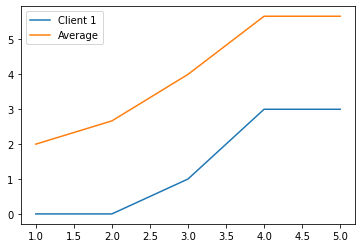

In [16]:
cum_sums_by_client = security_breaches.cumsum(axis = 0)
plt.plot(np.arange(1,6), cum_sums_by_client[:, 0], label = "Client 1")
plt.plot(np.arange(1,6), cum_sums_by_client.mean(axis = 1), label = "Average")
plt.legend()
plt.show()

##############################################################################################
##############################################################################################
##############################################################################################

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Practice Summarizing Data

In [18]:
monthly_sales = np.array([[ 4134, 23925,  8657],
       [ 4116, 23875,  9142],
       [ 4673, 27197, 10645],
       [ 4580, 25637, 10456],
       [ 5109, 27995, 11299],
       [ 5011, 27419, 10625],
       [ 5245, 27305, 10630],
       [ 5270, 27760, 11550],
       [ 4680, 24988,  9762],
       [ 4913, 25802, 10456],
       [ 5312, 25405, 13401],
       [ 6630, 27797, 18403]])

In *__monthly_sales__* data, row represents month and column represent industries

In [19]:
print(monthly_sales)

[[ 4134 23925  8657]
 [ 4116 23875  9142]
 [ 4673 27197 10645]
 [ 4580 25637 10456]
 [ 5109 27995 11299]
 [ 5011 27419 10625]
 [ 5245 27305 10630]
 [ 5270 27760 11550]
 [ 4680 24988  9762]
 [ 4913 25802 10456]
 [ 5312 25405 13401]
 [ 6630 27797 18403]]


In [20]:
# Create a 2D array of total monthly sales across industries
monthly_industry_sales = monthly_sales.sum(axis = 1, keepdims = True)
print(monthly_industry_sales)

[[36716]
 [37133]
 [42515]
 [40673]
 [44403]
 [43055]
 [43180]
 [44580]
 [39430]
 [41171]
 [44118]
 [52830]]


In [21]:
# Add column "monthly_industry_sales" as the last column in monthly_sales
monthly_sales_with_total = np.concatenate((monthly_sales, monthly_industry_sales), axis = 1 )
print(monthly_sales_with_total)

[[ 4134 23925  8657 36716]
 [ 4116 23875  9142 37133]
 [ 4673 27197 10645 42515]
 [ 4580 25637 10456 40673]
 [ 5109 27995 11299 44403]
 [ 5011 27419 10625 43055]
 [ 5245 27305 10630 43180]
 [ 5270 27760 11550 44580]
 [ 4680 24988  9762 39430]
 [ 4913 25802 10456 41171]
 [ 5312 25405 13401 44118]
 [ 6630 27797 18403 52830]]


In [22]:
# Create the 1D array avg_monthly_sales
avg_monthly_sales = monthly_sales.mean(axis = 1)
print(avg_monthly_sales)

[12238.66666667 12377.66666667 14171.66666667 13557.66666667
 14801.         14351.66666667 14393.33333333 14860.
 13143.33333333 13723.66666667 14706.         17610.        ]


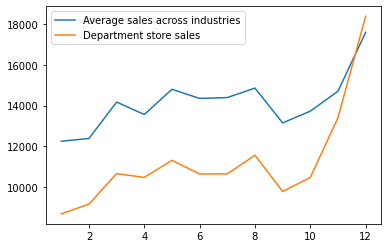

In [23]:
# Plot avg_monthly_sales by month
plt.plot(np.arange(1, 13), avg_monthly_sales, label="Average sales across industries")

# Plot department store sales by month
plt.plot(np.arange(1, 13), monthly_sales[:, 2], label="Department store sales")
plt.legend()
plt.show()

In [24]:
# Find cumulative monthly sales for each industry
cumulative_monthly_industry_sales = monthly_sales.cumsum(axis = 0)
print(cumulative_monthly_industry_sales)

[[  4134  23925   8657]
 [  8250  47800  17799]
 [ 12923  74997  28444]
 [ 17503 100634  38900]
 [ 22612 128629  50199]
 [ 27623 156048  60824]
 [ 32868 183353  71454]
 [ 38138 211113  83004]
 [ 42818 236101  92766]
 [ 47731 261903 103222]
 [ 53043 287308 116623]
 [ 59673 315105 135026]]


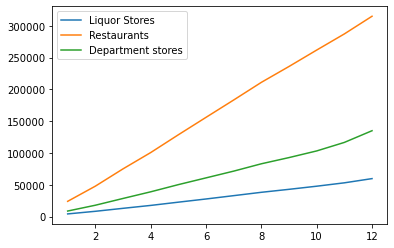

In [25]:
# Plot each industry's cumulative sales by month as separate lines
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,0], label="Liquor Stores")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,1], label="Restaurants")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,2], label="Department stores")
plt.legend()
plt.show()